# Jamboree Education - Business Case Study

**Problem Statement:** We have the dataset of student details from Jamboree - an educational institution that assists students with securing admissions abroad. By conducting an exploratory data analysis of the given data, we attempt to unearth crucial insights regarding the various factors that maybe impacting chance of admission. We will also look into interrelationship between the various factors. 
Additionally, we will use linear regression to build a machine learning model that can give predictions about any individual's admission chances based on values of key variables.

## Basic Wrangling and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Jamboree_Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
# dropping unnecessary column
df.drop(columns=['Serial No.'], inplace=True)

In [4]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.rename(columns={'GRE Score': 'gre', 'TOEFL Score': 'toefl', 'University Rating': 'uni_rating',
                   'SOP': 'sop', 'LOR ': 'lor', 'CGPA': 'cgpa', 'Research': 'research',
                   'Chance of Admit ': 'admission_chance'}, inplace=True)

In [6]:
df_copy = df.copy()

**Dataset Columns**

Column (Feature)           | Description                         
---------------------------|---------------------------------------
gre                        | GRE Score (out of 340)              | 
toefl                      | TOEFL Score (out of 120)            | 
uni_rating                 | University Rating (out of 5)         | 
sop                        | Statement of Purpose Rating (out of 5)      | 
lor                        | Lettor of Recommendation Rating (out of 5)  | 
cgpa                       | Cumulative GPA (UG) (out of 10)        | 
research                   | Research Experience (0 or 1)  | 
admission_chance ( **Target** )          | Chance of Admission (0 to 1)| 
                        

In [7]:
df.shape

(500, 8)

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gre               500 non-null    int64  
 1   toefl             500 non-null    int64  
 2   uni_rating        500 non-null    int64  
 3   sop               500 non-null    float64
 4   lor               500 non-null    float64
 5   cgpa              500 non-null    float64
 6   research          500 non-null    int64  
 7   admission_chance  500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

gre                 0
toefl               0
uni_rating          0
sop                 0
lor                 0
cgpa                0
research            0
admission_chance    0
dtype: int64

> The dataset has 500 records and 8 features and is quite clean with no missing values or duplicate records. .

In [13]:
df.describe().T.iloc[:, 1:]

,mean,std,min,25%,50%,75%,max
gre,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
toefl,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
uni_rating,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
sop,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
lor,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
cgpa,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
research,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
admission_chance,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


> We see that there are no problems with data integrity : all columns have values within the expected range.

In [14]:
# unique values in each column

for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())
    print("=======x=======")

gre: 49 unique values
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
=======x=======
toefl: 29 unique values
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
=======x=======
uni_rating: 5 unique values
[4 3 2 5 1]
=======x=======
sop: 9 unique values
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
=======x=======
lor: 9 unique values
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
=======x=======
cgpa: 184 unique values
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68

> `gre`, `toefl`, `cgpa` and `admission_chance` are numerical data type where as `research`, `lor`, `sop`, and `uni_rating` can be considered as categorical (ordinal) data.

> We could convert the categorical columns into 'category' dtype, however given that the dataset is already very light (~31 KB only), there maybe no real value to be gained.

In [15]:
numerical_cols = ['gre', 'toefl', 'cgpa', 'admission_chance']
categorical_cols = ['research', 'lor', 'sop', 'uni_rating']

In [16]:
# converting to categorical dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.memory_usage(deep=True).sum()/1024

np.float64(18.76171875)

> Memory usage has dropped to just under 19KB from 31KB

In [17]:
# outlier analysis

def outlier_detection(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    pct = len(data[(data[col] < lower_bound) | (
        data[col] > upper_bound)]) / len(data) * 100
    return f"The percentage of outliers in {col.upper()} is {pct:.2f}%"


for col in numerical_cols:
    print(outlier_detection(df, col))

The percentage of outliers in GRE is 0.00%
The percentage of outliers in TOEFL is 0.00%
The percentage of outliers in CGPA is 0.00%
The percentage of outliers in ADMISSION_CHANCE is 0.40%


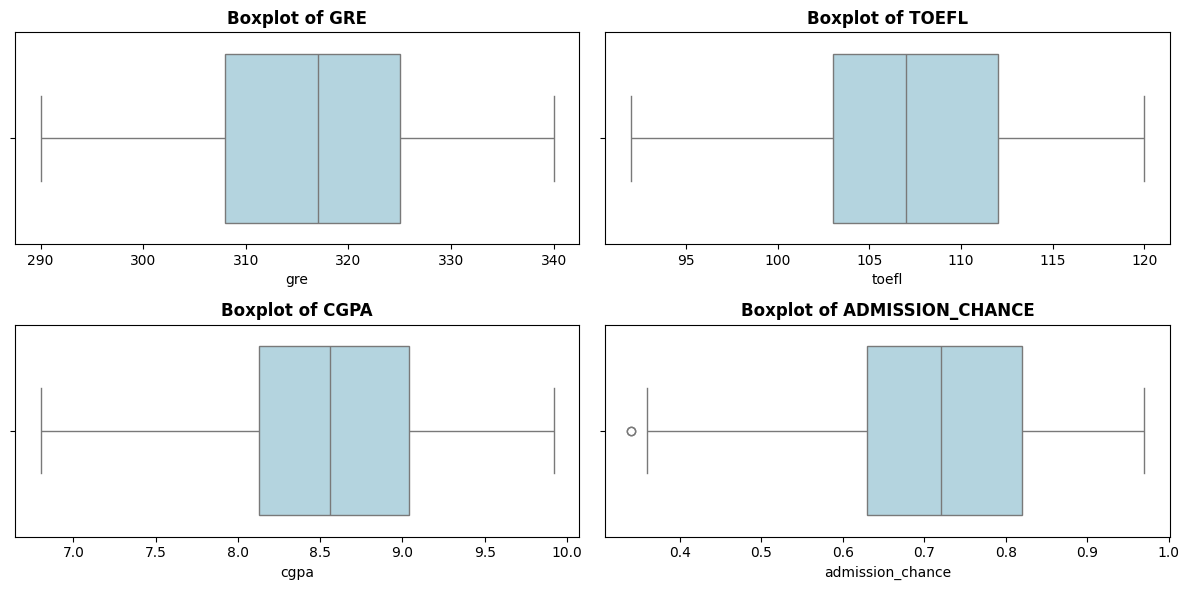

In [18]:
# visualizing outliers using boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Boxplot of {col.upper()}',
              fontsize=12, fontdict={'weight': 'bold'})
plt.tight_layout()
plt.show()

> We see that outliers are present only in the admission_chance (ie target variable). However, given that it is miniscule proportions (only 0.4%), we can keep them and not bother removing/clipping them. 

Let us now look into the categorical variables and understand their visualizations.

Visualizing RESEARCH and its relationship with admission chance


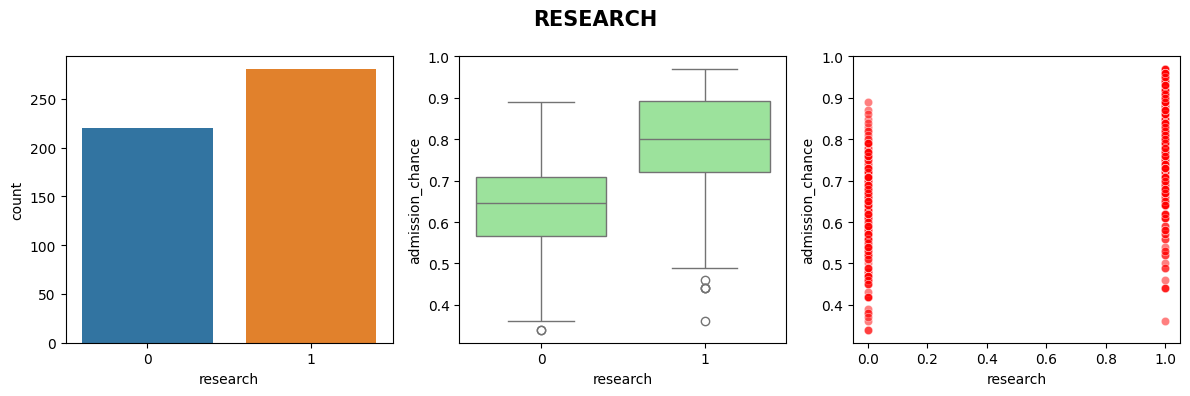

Visualizing LOR and its relationship with admission chance


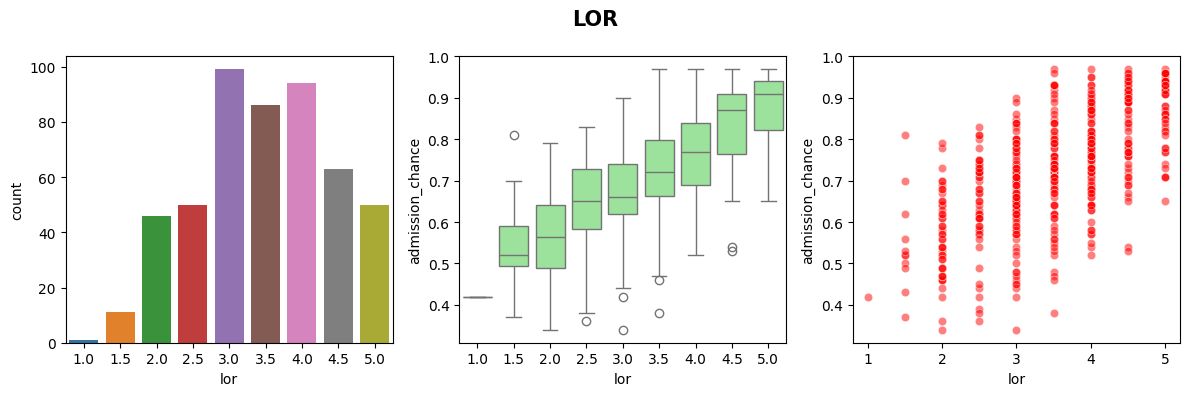

Visualizing SOP and its relationship with admission chance


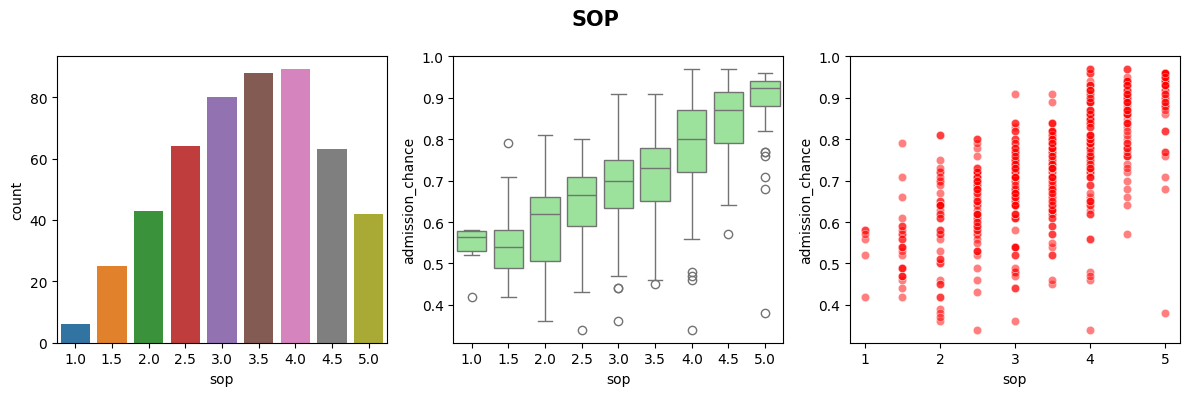

Visualizing UNI_RATING and its relationship with admission chance


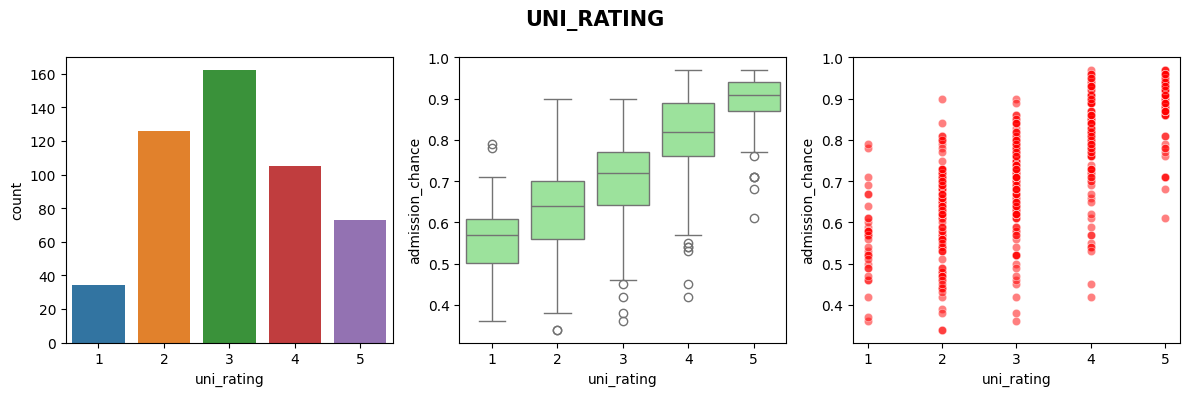

In [19]:
for col in categorical_cols:
    print(
        f"Visualizing {col.upper()} and its relationship with admission chance")
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'{col.upper()}', fontsize=15, fontweight='bold')
    plt.subplot(1, 3, 1)
    sns.countplot(data=df, x=col, hue=col, legend=False)
    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x=col, y='admission_chance', color='lightgreen')
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=df, x=col, y='admission_chance',
                    color='red', alpha=0.5)
    plt.tight_layout()
    plt.show()

> We see that for each categorical variable, there are distinct patterns in the relationship with admission chance. 

> We see that overall the chance of admission increases with an increase in rating of `SOP`, `LOR` and `University`. We also see that in general there is a higher chance of admission with `Research` than without. All of this makes sense and is along expected lines of reasoning.

> We see that most students fall within the 3-4 range for LOR and SOP. We also see that most students are applying from mid-ranked universities with rating of 3.  

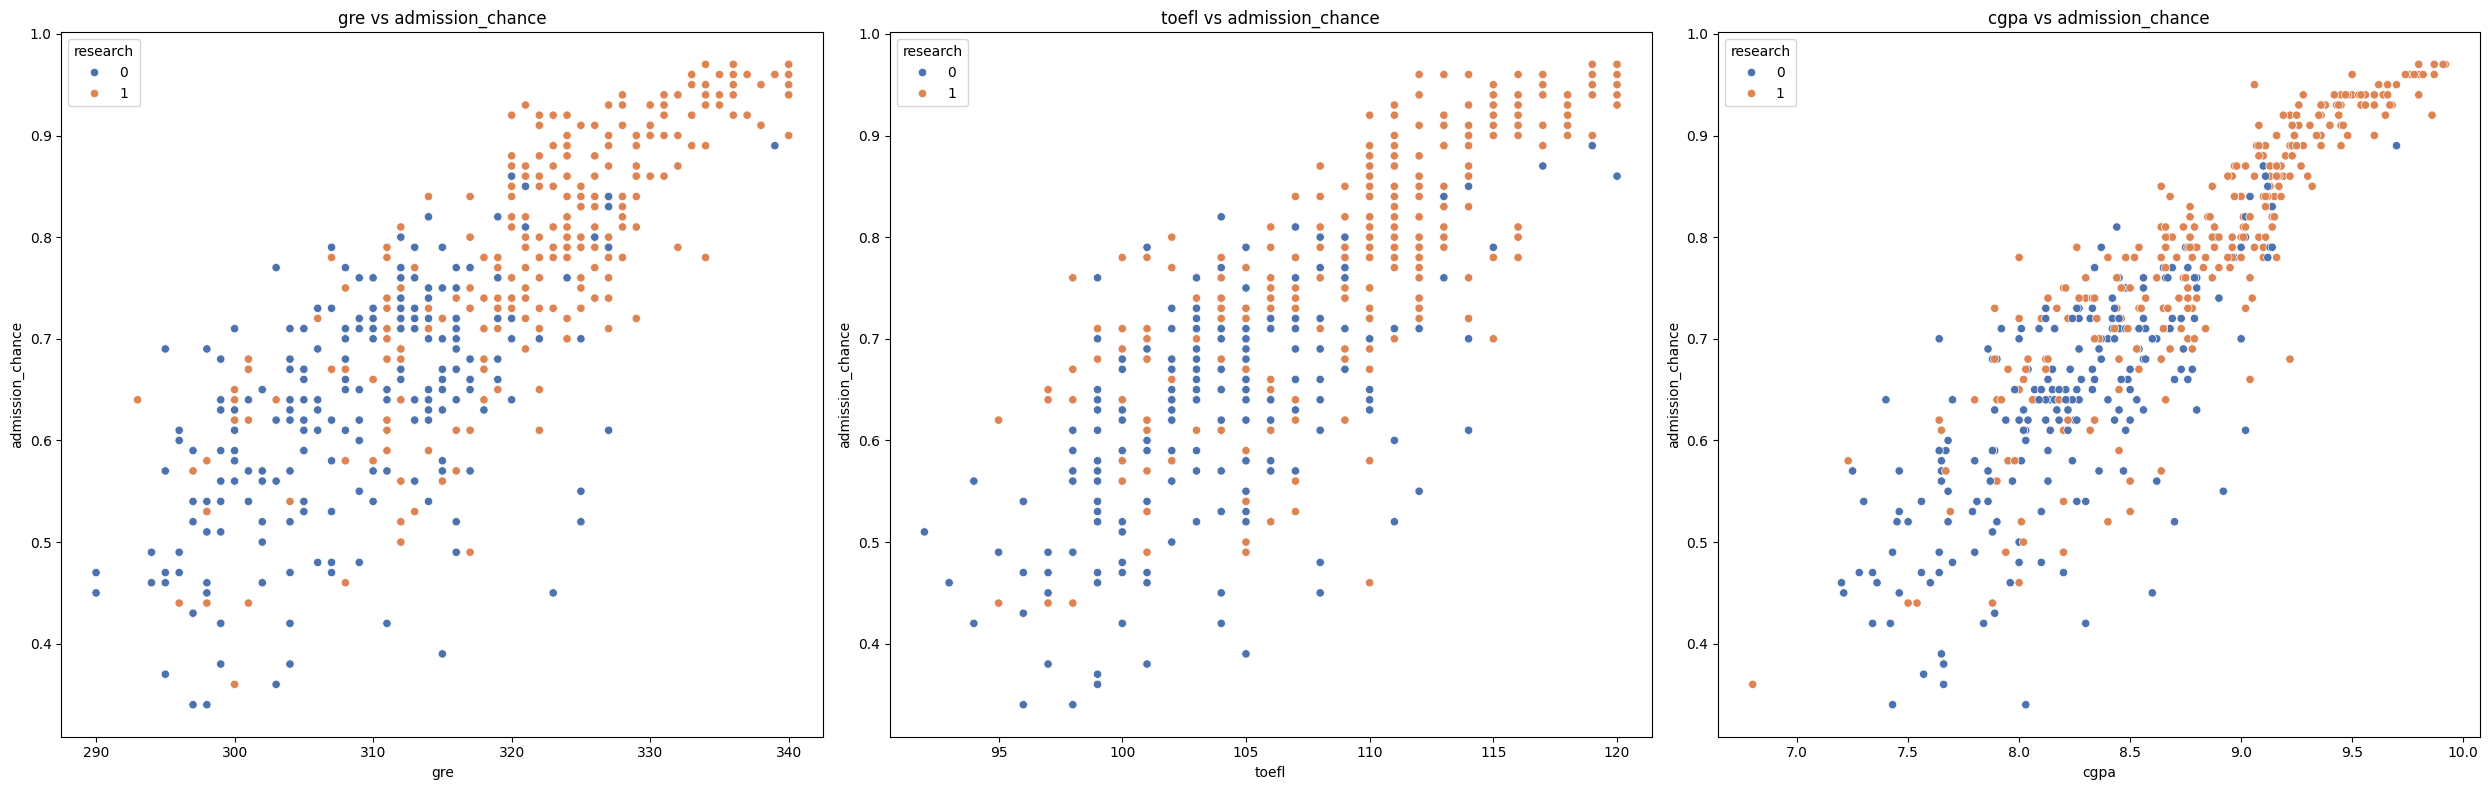

In [ ]:
# scatter plots for numerical columns against admission chance
plt.figure(figsize=(25, 8))
for i in range(len(numerical_cols)):
    if numerical_cols[i] == 'admission_chance':
        continue
    plt.subplot(1, 3, i+1)

    sns.scatterplot(
        data=df, x=numerical_cols[i], y='admission_chance', hue='research', palette='deep')
    plt.title(f"{numerical_cols[i]} vs admission_chance")
    plt.tight_layout()
plt.show()

> These scatterplots show that the students who do research have higher likelihood of admission.

> GRE, TOEFL and CGPA seems to follow a linearly increasing pattern with admission chances. Once again, that is not surprising at all.

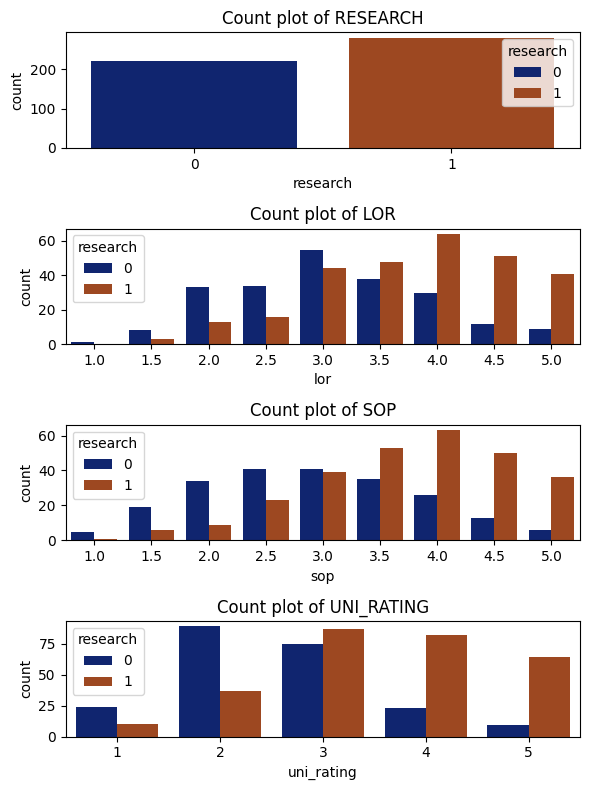

In [ ]:
# Count plots for categorical columns
fig, axes = plt.subplots(4, 1, figsize=(6, 8))
for i in range(len(categorical_cols)):
    sns.countplot(
        data=df, x=categorical_cols[i], hue='research', ax=axes[i], palette='dark')
    axes[i].set_title(f"Count plot of {categorical_cols[i].upper()}")
plt.tight_layout()
plt.show()

> Most of the students with SOP rating of more than 3 have done research. Possibly indicating that SOPs are strengthened by mentioning research experience.

> Most of the students with LOR rating $>=$ 3 have done research. This is indicative of the fact that a strong recommendation probably requires research experience with a mentor.

> More than half of all the students have applied having done research.

> 


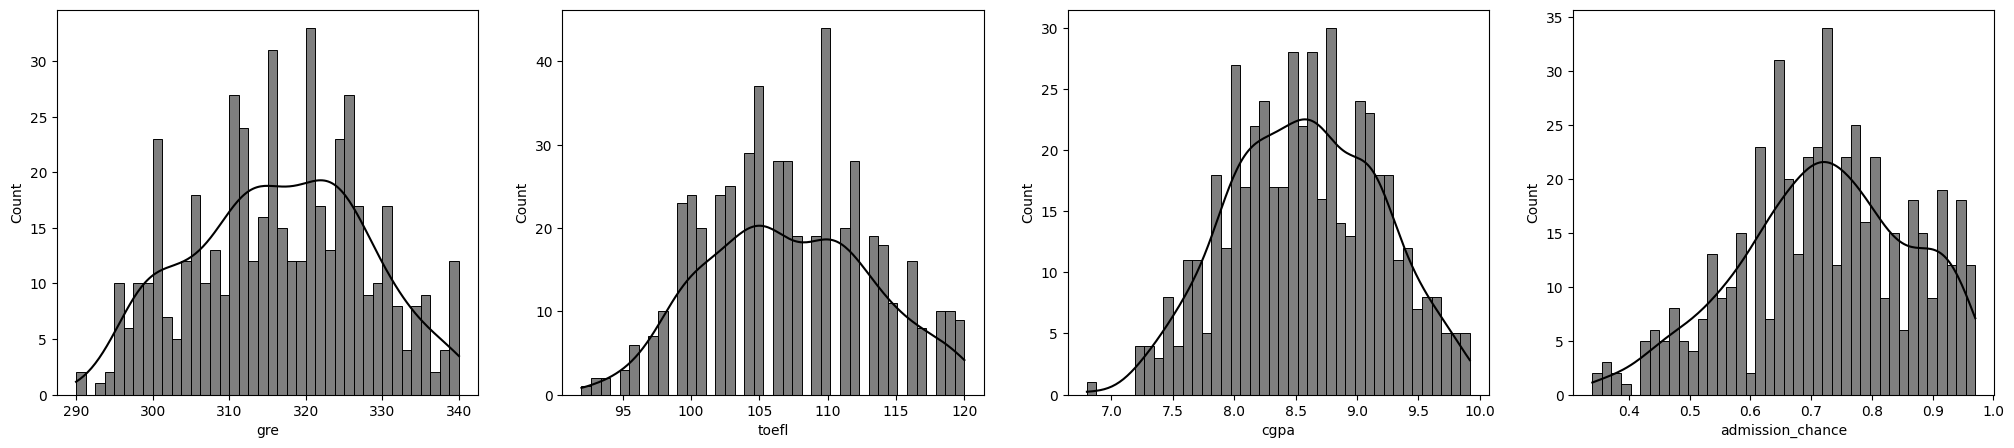

In [ ]:
# KDE plots for numerical columns
plt.figure(figsize=(25, 5))
for i in range(len(numerical_cols)):
    plt.subplot(1, 4, i+1)
    sns.histplot(data=df, x=numerical_cols[i],
                 kde=True, bins=40, color='black')

plt.show()

> The distribution of GRE, TOEFL, CGPA scores certainly looks like they can be approximated as guassian. However this will be tested later.

> The admission chance is skewed left indicating that there are a large number of cases with lower probability of admissions.    


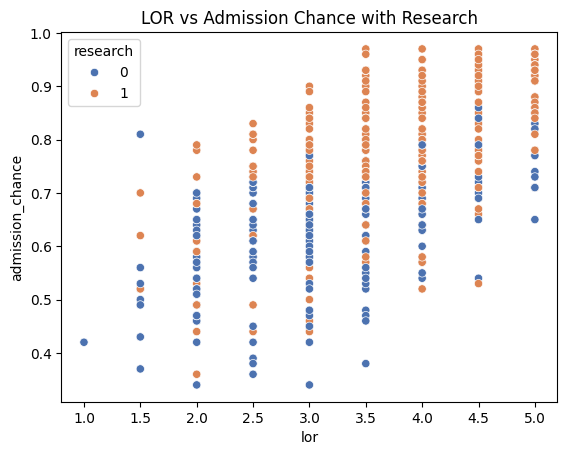

In [ ]:
# lor and research vs admission chance

sns.scatterplot(data=df, x='lor', y='admission_chance',
                hue='research', palette='deep')
plt.title('LOR vs Admission Chance with Research')
plt.show()

> As seen before, we see that the research aspect seems to weigh significantly when it comes to LOR rating and chance of admission.

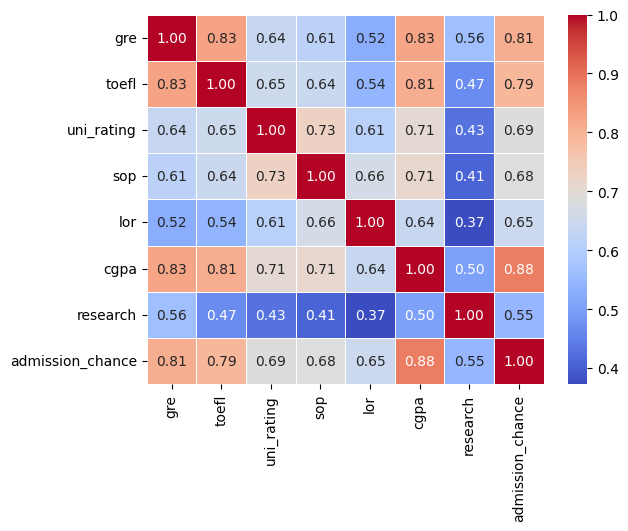

In [ ]:
# pearson correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

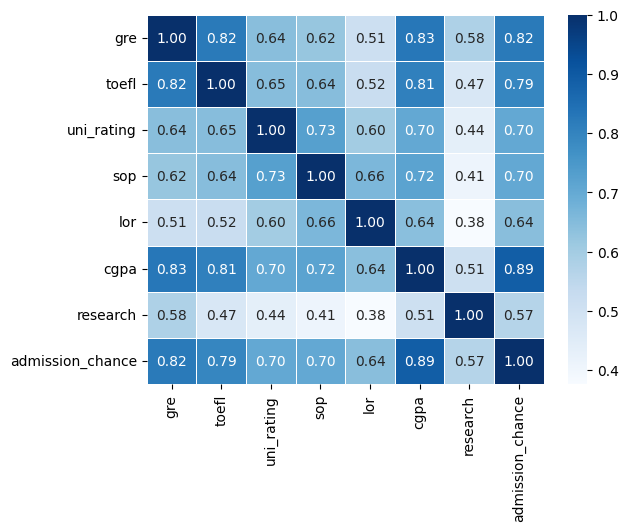

In [ ]:
# spearman correlation heatmap
sns.heatmap(df.corr('spearman'), annot=True,
            cmap='Blues', fmt='.2f', linewidths=0.5)
plt.show()

> We see that there is a strong positive correlation between `admission_chance` and `GRE`, `TOEFL` and `CGPA`. This is expected.

> We also see strong positive correlation between `GRE`, `TOEFL` and `CGPA`. This is also something we expect to happen as typically students who score high in one tends to score high in the others as well.

> There are no correlated independent features with a high enough value (such as >0.9) that we can eliminate one of them.

> Both pearson and spearman correlations are almost the same. This means that the correlations are pretty much guaranteed to be linear.  

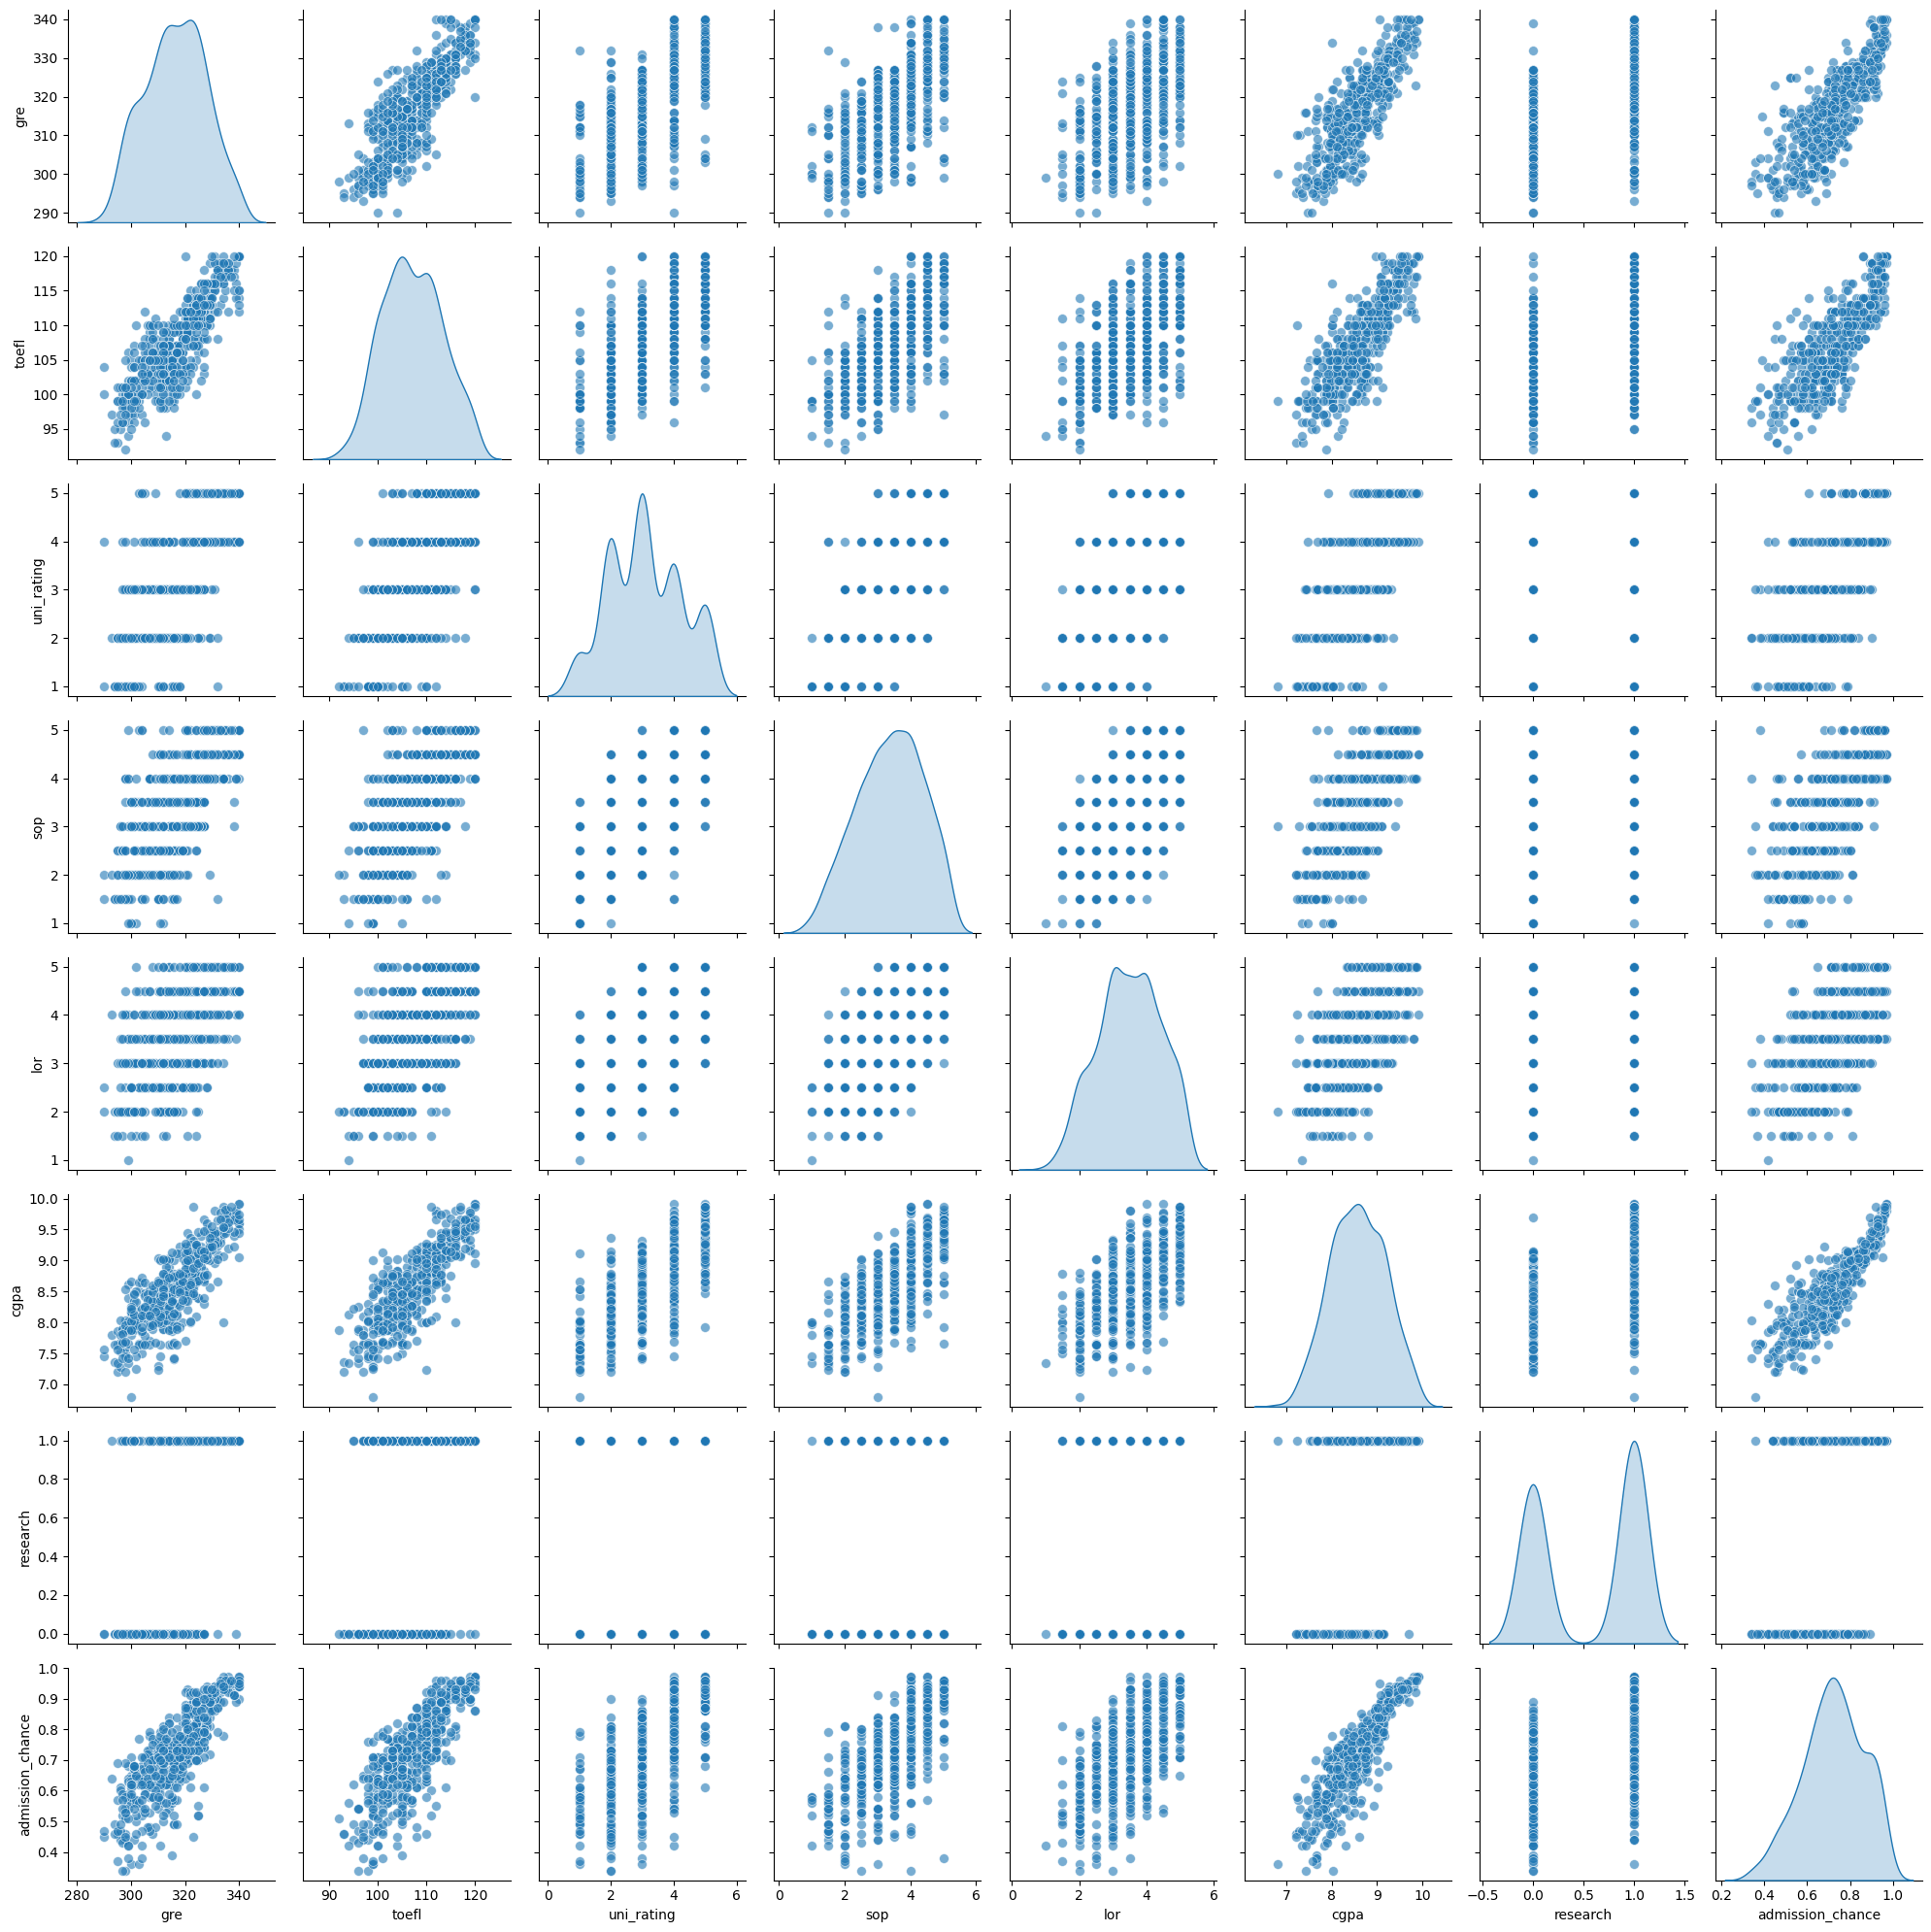

In [ ]:
sns.pairplot(df_copy, diag_kind="kde", markers="o",
             plot_kws={'alpha': 0.6, 's': 50})
plt.tight_layout()
plt.show()

> The pair plots further confirm what we have already seen. 

> We have a largely linear set of data with respect to the target variable of admission_chance.

> We also see that the distribution of most of the numerical variables are somewhat normal. 



## Data Preprocessing

We now prepare the data for training the model. The target variable is `admission_chance` and the independent variables are `gre`, `toefl`, `uni_rating`, `sop`, `lor`, `cgpa` and `research`. 

In [ ]:
y = df['admission_chance']
X = df.drop(columns=['admission_chance'])
display(X.head())
display(y.head())

,gre,toefl,uni_rating,sop,lor,cgpa,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: admission_chance, dtype: float64

We do not have to worry about any string categorical features as we do not have any. And the ordinal categorical columns (which are numerical) are fine as well.

We perform the train test split first (80-20 split) and then perform normalization of all the columns. We will use `StandardScaler` to standardize the values. However, we could also have used `MinMaxScaler`.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

## Linear Regression Using `sklearn`

We now train a linear regression model on this scaled training data using `sklearn`:

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
training_cols = X_train.columns
# fit and transform the training data, then transforming the test data
X_train_sscaled = sscaler.fit_transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

X_train_sscaled = pd.DataFrame(X_train_sscaled, columns=training_cols)
X_test_sscaled = pd.DataFrame(X_test_sscaled, columns=training_cols)

display(X_train_sscaled.head())

,gre,toefl,uni_rating,sop,lor,cgpa,research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [ ]:
# training
from sklearn.linear_model import LinearRegression

modely = LinearRegression()
modely.fit(X_train_sscaled, y_train)

# finding the coefficients and intercept for the model

display(pd.DataFrame({'Features': training_cols, 'Coefficients': modely.coef_}).sort_values(
    by='Coefficients', ascending=False).reset_index(drop=True))
print(f"Intercept: {modely.intercept_}")

,Features,Coefficients
0,cgpa,0.067581
1,gre,0.026671
2,toefl,0.018226
3,lor,0.015866
4,research,0.011940
5,uni_rating,0.002940
6,sop,0.001788


Intercept: 0.7241749999999999


> We see that the model gives maximum weightage to CGPA, followed by GRE score and TOEFL score. This is in line with our insights from the EDA.

Let us check the model performance on both the training and test data. We do this by calculating the mean squared error (MSE) and the $R^2$ score.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions_train = modely.predict(X_train_sscaled)
predictions_test = modely.predict(X_test_sscaled)

mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

r2_test = r2_score(y_test, predictions_test)
r2_train = r2_score(y_train, predictions_train)

print(f"Training Data Performance:")
print(f"Mean Squared Error: {mse_train}")
print(f"R^2 Score: {r2_train}\n")

print(f"Test Data Performance:")
print(f"Mean Squared Error: {mse_test}")
print(f"R^2 Score: {r2_test}")

Training Data Performance:
Mean Squared Error: 0.0035265554784557574
R^2 Score: 0.8210671369321554

Test Data Performance:
Mean Squared Error: 0.0037046553987884106
R^2 Score: 0.8188432567829629


> We see that the model performs reasonably well on both training data and testing data. 

> The MSE values are almost identical - .0035 for training and 0.0037 for test data. These are very low MSE values, and therefore seem to suggest good model performance.
> 
> Similarly, the $R^2$ score is also almost identical (0.8210 for training and 0.8188 for test data). The similar $R^2$ values imply that the model is neither underfitting nor overfitting, and hence the model performance is reasonable.

We can in fact calculate the adjusted $R^2$ score as well.

In [ ]:
def adjusted_r2_score(r2, n, p):
    """
    r2 (float): R^2 score
    n (int): Number of observations
    p (int): Number of predictors
    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
n_train = X_train_sscaled.shape[0]
p_train = X_train_sscaled.shape[1]
n_test = X_test_sscaled.shape[0]
p_test = X_test_sscaled.shape[1]

print(
    f"Adjusted R^2 Score for Training Data: {adjusted_r2_score(r2_train, n_train, p_train)}")
print(
    f"Adjusted R^2 Score for Test Data: {adjusted_r2_score(r2_test, n_test, p_test)}")

Adjusted R^2 Score for Training Data: 0.8178719072345153
Adjusted R^2 Score for Test Data: 0.8050595915381884


> The values of adjusted R^2 squares further cement our belief in the validity of the linear regression model.

## Linear Regression Using `statsmodel` 

We use the `statsmodel` library to do an indepth analysis for linear regression model.

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_sscaled)  # adding constant for intercept
model_sm = sm.OLS(y_train.values, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 07 Aug 2025   Prob (F-statistic):          3.41e-142
Time:                        17:47:21   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

> We see that the model has high p-values (>>0.05) for `sop` (p=0.721) and `uni_rating` (p=0.541). 

> Therefore, we can try retraining the model and checking the performance again.

In [ ]:
X_train_2 = X_train_sscaled.drop(columns=['sop', 'uni_rating'])
X_train_new = sm.add_constant(X_train_2)  # adding constant for intercept
model_sm = sm.OLS(y_train.values, X_train_new).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 07 Aug 2025   Prob (F-statistic):          1.36e-144
Time:                        17:49:15   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.830      0.0

> We see that the model is performing just as well without the features `sop` and `uni_rating`. In fact, the $R^2$ and adjusted $R^2$ scores are exactly identical. This is a bit perplexing because we would have expected that atleast university rating to have an impact. 

We can confirm this by using `sklearn` as well.

In [ ]:
# confirming with sklearn

model_new = LinearRegression()
model_new.fit(X_train_2, y_train)

X_test_2 = X_test_sscaled.drop(columns=['sop', 'uni_rating'])

predictions_train_2 = model_new.predict(X_train_2)
predictions_test_2 = model_new.predict(X_test_2)

mse_train = mean_squared_error(y_train, predictions_train_2)
mse_test = mean_squared_error(y_test, predictions_test_2)

r2_train_2 = r2_score(y_train, predictions_train_2)
r2_test_2 = r2_score(y_test, predictions_test_2)

print(f"Training Data Performance:")
print(f"Mean Squared Error: {mse_train}")
print(f"R^2 Score: {r2_train_2}\n")

print(f"Test Data Performance:")
print(f"Mean Squared Error: {mse_test}")
print(f"R^2 Score: {r2_test_2}")

Training Data Performance:
Mean Squared Error: 0.003533146938986871
R^2 Score: 0.8207326947514394

Test Data Performance:
Mean Squared Error: 0.0037730207651168884
R^2 Score: 0.8155002070847488


We can also calculate the adjusted $R^2$ scores:

In [ ]:
n_train_2 = X_train_2.shape[0]
p_train_2 = X_train_2.shape[1]
n_test_2 = X_test_2.shape[0]
p_test_2 = X_test_2.shape[1]

print(
    f"Adjusted R^2 Score for Training Data: {adjusted_r2_score(r2_train_2, n_train_2, p_train_2)}")
print(
    f"Adjusted R^2 Score for Test Data: {adjusted_r2_score(r2_test_2, n_test_2, p_test_2)}")

Adjusted R^2 Score for Training Data: 0.8184577289487927
Adjusted R^2 Score for Test Data: 0.8056863883126609


> Thus, we are forced to come to the conclusion that SOP and university ratings are not impactful for the purpose to predicting admission chance to top US universities (!!!). Alas, we can only go where the data leads us.

Additionally, for the new model, we can also calculate Root Mean Square Error as well as Mean Absolute Error.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, predictions_train_2)
mae_test = mean_absolute_error(y_test, predictions_test_2)


print(f"Mean Absolute Error for Training Data: {mae_train}")
print("Root Mean Square Error for Training Data: ", np.sqrt(mse_train))
print(f"Mean Absolute Error for Test Data: {mae_test}")
print("Root Mean Square Error for Test Data: ", np.sqrt(mse_test))

Mean Absolute Error for Training Data: 0.042691264836063995
Root Mean Square Error for Training Data:  0.05944028044169098
Mean Absolute Error for Test Data: 0.042923455782657785
Root Mean Square Error for Test Data:  0.061424919740418776


> Thus, we see that even these metrics are quite low for our model.

## Testing Assumptions of Linear Regression


The assumptions of linear regression are :


- Linearity of the data
- No multicollinearity
- Mean of Residuals is zero
- No heteroskedacity
- Normality of Residuals

We will now test these one by one to ensure that our entire model is infact valid.

### 1. Linearity of Data

There should be linear relationship between the independent variables and the dependent variable. This can be confirmed by using scatter plots: 

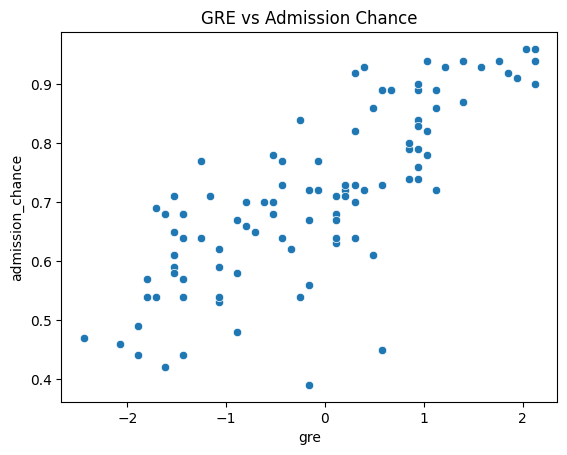

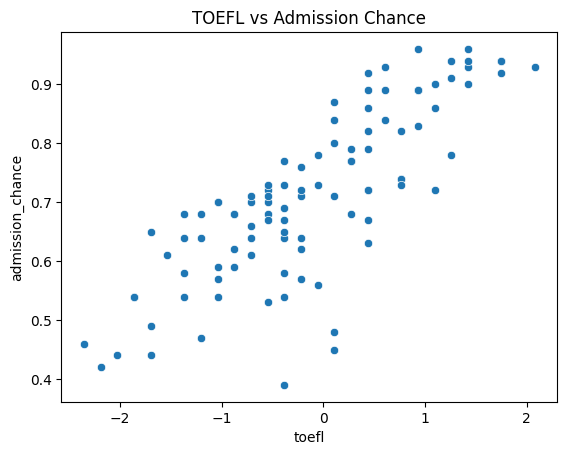

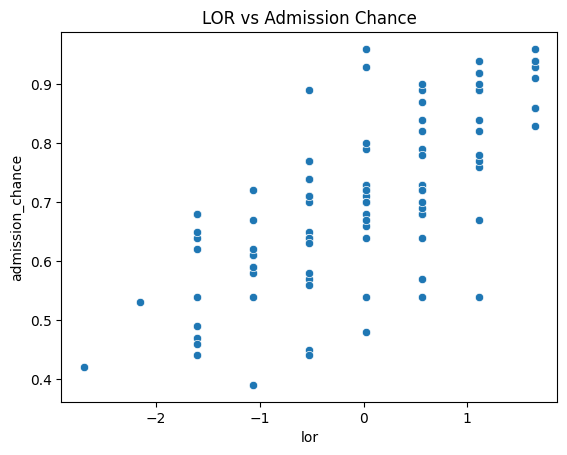

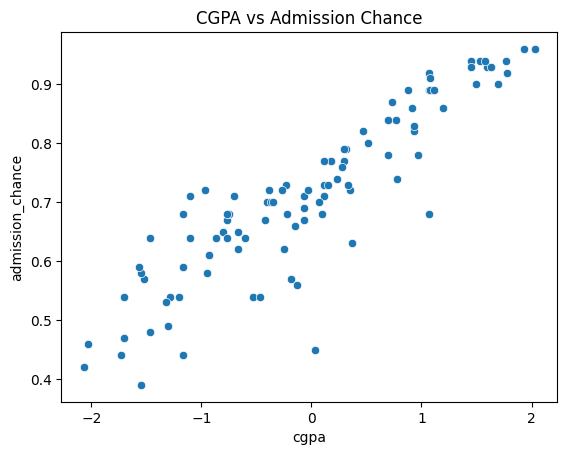

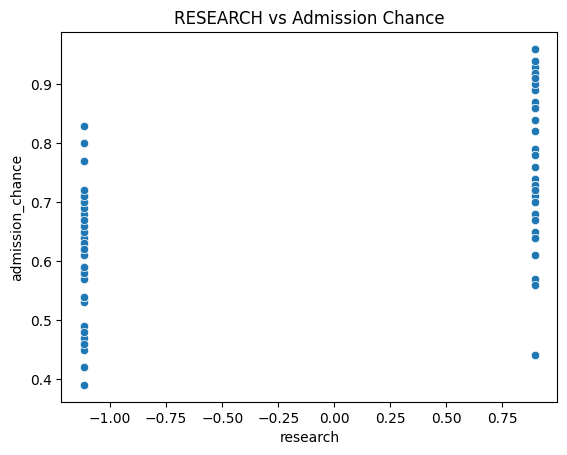

In [ ]:
linear_df = X_test_2.copy()
linear_df['admission_chance'] = y_test.values
for col in linear_df.columns:
    if col != 'admission_chance':
        sns.scatterplot(data=linear_df, x=col, y='admission_chance')
        plt.title(f'{col.upper()} vs Admission Chance')
        plt.show()

We can further check for linearity by plotting predicted values against residuals. Residual is defined as the difference between the observed value and the predicted value of the target variable.

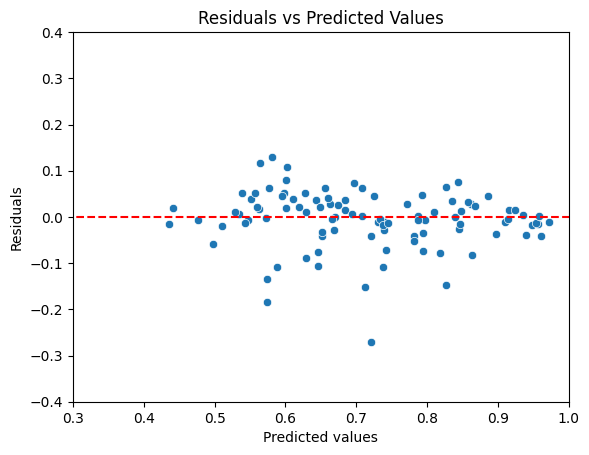

In [ ]:
residuals = y_test.values - predictions_test_2

sns.scatterplot(x=predictions_test_2, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4, 0.4)
plt.xlim(0.3, 1)
sns.lineplot(x=[0, 10], y=[0, 0], color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

> Given the way the spread around zero, we can conclude that the assumption of linearity holds.
> 

### 2. Multicollinearity

We will use variance inflation factor (VIF) to identify any multicollinearity in our data. If for any feature, we find a VIF value of over 5, we consider that there is multicollinearity and can be removed from our model. However, we should also ensure that removal of the feature does not affect model performance too badly. 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(
        data.values, i) for i in range(data.shape[1])]
    return vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)


calculate_vif(X_train_2)

,feature,VIF
0,gre,4.471557
1,cgpa,4.281365
2,toefl,3.540082
3,lor,1.655867
4,research,1.504670


> Here we see that all the VIF values for the relevant features are less than 5, and therefore there is not enough multicollinearity to be concerned with.

### 3. Mean of Residuals

Mean of residuals should be close to zero.

In [56]:
residuals_mean = np.mean(residuals)
print(f"Mean of residuals: {residuals_mean}")

Mean of residuals: -0.005305947942348644


> Indeed, we see that the mean of residuals is very close to zero! So we move to the next assumption.

### 4. Homoscedasticity

> The plot certainly implies that there is no heteroscedasticity. 

This can be further confirmed by doing the Goldfeld-Quandt Test from `statsmodels`:
 

The null and alternate hypotheses are:

- $H_0$: there is no heteroscedasticity (ie there is homoscedasticity)
- $H_a$: there is heteroscedasticity (variance increases with independent variable)

In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

gq_test = het_goldfeldquandt(residuals, X_test_2)
print(f"Goldfeld-Quandt Test Statistic: {gq_test[0]}")
print(f"P-value: {gq_test[1]}")

if gq_test[1] > 0.05:
    print("Fail to reject the null hypothesis: No heteroscedasticity detected.")
else:
    print("Reject the null hypothesis: Heteroscedasticity detected.")

Goldfeld-Quandt Test Statistic: 0.5552069055725092
P-value: 0.9743438620760827
Fail to reject the null hypothesis: No heteroscedasticity detected.


> Thus, we can confirm that there is no heteroscedasticity.

### 5. Normality of Residuals

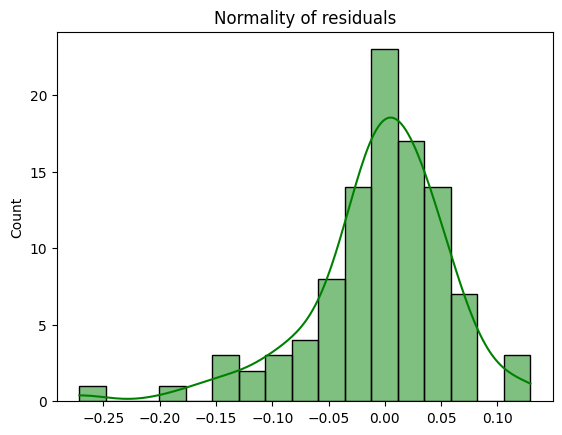

In [ ]:
sns.histplot(residuals, kde=True, color='g')
plt.title('Normality of residuals')
plt.show()

> We see that the distribution is almost normal. We can further confirm this using qqplots.

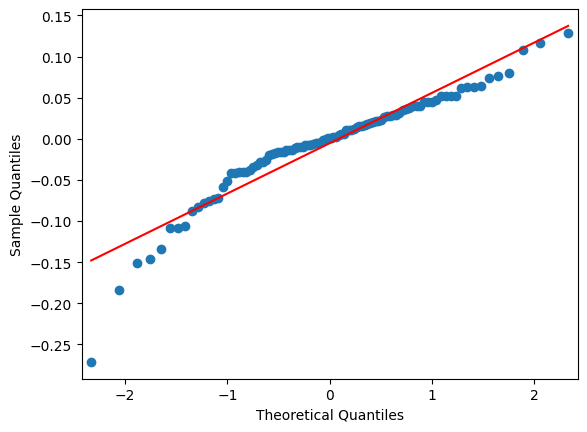

In [77]:
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.show()

> We can conclude from the QQ-Plot of the residuals that their distribution is almost normal.

Additionally, we can also plot the predicted values vs test values to get a sense for the spread and to see if there is any irregular patterns. 

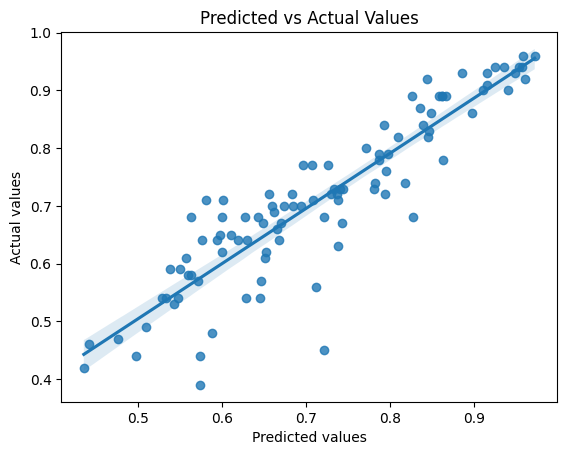

In [83]:
sns.regplot(x=predictions_test_2, y=y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual Values')
plt.show()

> Thus, all the assumptions of linear regression are met and therefore our linear regression model is valid and can be used to predict chance of admission for candidates provided their information regarding CGPA, GRE, TOEFL, Research and LOR are given. 

# Insights 

* There were no missing values or duplicate records in the data.
* There were no outliers of significance in the numerical data.
* Distribution of the chance of admission skews left indicating that a significant number of applicants have low chance of admission.
* Exam scores (CGPA/GRE/TOEFL) have a strong positive correlation with chance of admission. These variables are also highly correlated amongst themselves as well.
* The ordinal categorical variables such as university ranking, research, quality of SOP and LOR also show an upward trend for chance of admission.
* We see that overall chance of admission increases with increase in ratings of SOP, LOR and University.
* We also see that typically, applicants with research experience tend to have higher chance of admission than those without.
* We also see that higher ranked LOR values have higher number of applicants with research experience indicating that close interaction with a senior/mentor helps to secure good recommendations.
* From the  model coefficients (weights), we can conclude that CGPA is the most significant predictor variable, followed by GRE and TOEFL scores. Research and LOR are also important. However, SOP and University Rating are the least significant.
* Linear Regression model have captured upto 82% of the variance in the target variable (chance of admission). The model performance is further illustrated by various metrics such as adjusted R2 score, mean square error (MSE), mean absolute error (MAE) etc. 
* The dataset has met the conditions required for linear regression such as linearity, normality of residuals, homoscedasticity etc.
* We also see from the OLS model summary that the SOP and  University rankings are not relevant predictors for chance of admission. Model without these two features performed as well as model with them.

# Recommendations

* Based on our linear regression model, applicants should focus the most on maximizing the exam scores as they have the most significance. 
* Applicants should be encouraged to conduct research.
* We could try to add more independent features for better model prediction. These could be work experience, internships, mock interview performance, extracurricular activities etc.